<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/LK99_GoogleColab_QE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick tutorial on LK99 (not meant for publication)

# Table of Contents

1. Install necessary packages
2. Visualize LK99 crystal structure and theoretical XRD pattern
3. Electronic bandstructure with [Density Functional Theory](https://en.wikipedia.org/wiki/Density_functional_theory)


# Install packages

In [82]:
!pip install -q jarvis-tools ase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.5 MB/s eta 0:00:00


In [2]:
%%time
import os
# Clone the QE git
if not os.path.exists('q-e'):
   os.system('git clone https://github.com/QEF/q-e.git')
# Install the dependencies
!apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc
%cd q-e
# run the configure file
!DFLAGS='-D__OPENMP -D__FFTW3 -D__MPI -D__SCALAPACK' FFT_LIBS='-lfftw3'  ./configure --enable-openmp
! make pw

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfftw3-bin libfftw3-double3 libfftw3-long3 libfftw3-quad3 libfftw3-single3
The following NEW packages will be installed:
  libfftw3-3 libfftw3-bin libfftw3-dev libfftw3-doc libfftw3-double3
  libfftw3-long3 libfftw3-quad3 libfftw3-single3
0 upgraded, 8 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,918 kB of archives.
After this operation, 26.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu8 [770 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-long3 amd64 3.3.8-2ubuntu8 [335 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-single3 amd64 3.3.8-2ubuntu8 [800 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libfftw3-3 amd64 3.3.8-2ubuntu8 [1,756 B]
Get:5 http://archive.ubuntu.com

In [ ]:
#!make ph

In [ ]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2200.214
BogoMIPS:                        4400.42
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

# POSCAR (atomic positions) from https://arxiv.org/abs/2307.16040

In [70]:
lk99="""CuPb9P6O25
1.0
9.685402198426486 3.671904787172497e-17 0.0
-4.842701099213242 8.387804349706988 0.0
0.0 0.0 7.236363678830991
Cu P Pb O
1 6 9 25
Cartesian
0.0 1.281059966976078e-30 7.12342473394026
5.913511456158812 5.5136297517395425 5.491439812536027
1.9537030382789464 2.3644362707340654 5.491439812536027
2.7210774460643483 0.33248975619045934 1.6424006419336872
3.7701069515400993 5.865037277655152 1.6424006419336872
6.660888803201968 0.5097383272333762 5.491439812536027
8.036918900035278 2.1902773158613758 1.6424006419336872
0.0 0.0 3.524853860442127
1.1620468644704207 3.6997323294126745 1.8583591436525837
4.842701099213243 2.795934783235662 0.028964832787846312
2.3471632824783937 5.635818719761039 5.4252423178851155
-2.219662346974499 5.531576079981211 1.8583591436525837
-1.1355205580154886 3.5371919603701083 5.4252423178851155
1.0576154825040782 7.544300290020089 1.8583591436525837
-1.2116427244629044 7.602598019282825 5.4252423178851155
4.842701099213243 2.795934783235662 3.5946227652700498
6.513077679943711 4.99528144438497 4.159178820432368
3.240668859741808 6.392934694816432 3.008536792684912
2.102822728564221 3.142850005460182 4.159178820432368
-2.314077181103608 7.997838560088329 3.008536792684912
4.47547308953114 4.911242722239266 5.620160737097916
6.858225516058317 2.056309599099759 5.620160737097916
4.960178959846298 6.725211615142792 1.1642144662942606
1.3811086139635 0.9330351789725713 1.1642144662942606
-0.9265916786382008 2.3848354445092155 3.008536792684912
8.18681572382993 0.729557555591621 1.1642144662942606
5.9122028891317955 0.24967289986183394 4.159178820432368
3.7921403010987857 1.453406152608411 1.8068890823933066
-1.597394103701162 7.650043567906085 0.6394911604733774
6.795528861825278 4.920073771115928 6.61432047854189
2.5811280225017526 5.946166439414625 0.6394911604733774
5.7058455425805015 0.042666837657979274 6.61432047854189
-0.9837339188005904 3.179398692093264 0.6394911604733774
0.6251546291421105 1.5579304182421958 5.54951815520682
3.1944046920502682 1.4202520283679616 5.620160737097916
-3.806071094258041 7.067439350455382 5.54951815520682
4.205317598839336 4.377011437936463 1.8068890823933066
3.1809164651159296 8.150238930716396 5.54951815520682
6.530645397701604 2.557386759162113 1.8068890823933066
2.0267288932339484 3.4250637409330777 6.61432047854189
-5.394710364105362e-16 5.591869566471325 2.487272490118416
"""
from jarvis.io.vasp.inputs import Poscar
lk99_atoms = Poscar.from_string(lk99).atoms

# Visualize atomic structure

<Axes: >

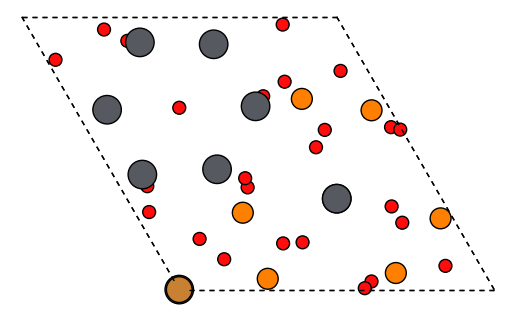

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
fig, ax = plt.subplots()
plt.axis('off')
#plot_atoms(lk99_atoms, ax, radii=0.3, rotation=('90x,45y,0z'))
plot_atoms(lk99_atoms.ase_converter(), ax, radii=0.3, rotation=('0x,0y,0z'))

# Theoretical [X-ray diffraction](https://en.wikipedia.org/wiki/X-ray_crystallography). Compare experimental XRD reported in the [arXiv paper](https://arxiv.org/abs/2307.12008).

Text(0, 0.5, 'Intensity')

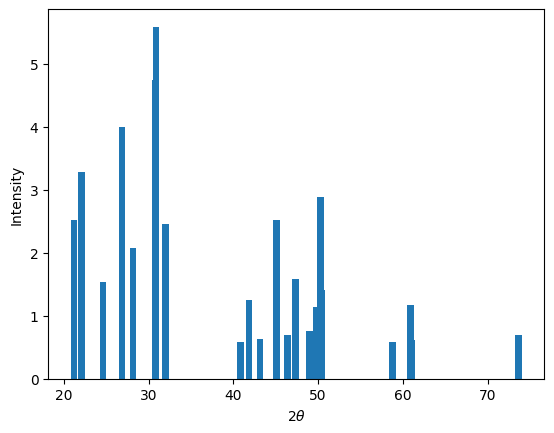

In [84]:
from jarvis.analysis.diffraction.xrd import XRD
from jarvis.core.atoms import ase_to_atoms
theta,d_hkls,intens = XRD().simulate(atoms=(lk99_atoms))
plt.bar(theta,intens)
plt.xlabel(r'2$\theta$')
plt.ylabel('Intensity')

In [71]:
qe_cmd = "/content/q-e/bin/pw.x"
!rm relax.json
from jarvis.tasks.qe.qe import QEjob
from jarvis.core.kpoints import Kpoints3D as Kpoints
kp=Kpoints([[2,1,1]])
# For better quality electronic structure, try k-points of [4,4,5] and also try to include DFT+U corrections
relax = {
            "control": {
                 "calculation": "'scf'",
                #"calculation":  "'vc-relax'",
                "restart_mode": "'from_scratch'",
                "prefix": "'RELAX'",
                "outdir": "'./'",
                "tstress": ".true.",
                "tprnfor": ".true.",
                "disk_io": "'nowf'",
                "wf_collect": ".true.",
                "pseudo_dir": None,
                "verbosity": "'high'",
                "nstep": 100,
            },
            "system": {
                "ibrav": 0,
                "nat": None,
                "ntyp": None,
                "ecutwfc": 45,
                "ecutrho": 250,
                "q2sigma": 1,
                "ecfixed": 44.5,
                "qcutz": 800,
                "occupations": "'smearing'",
                "degauss": 0.01,
                "lda_plus_u": ".false.",
            },
            "electrons": {
                "diagonalization": "'david'",
                "mixing_mode": "'local-TF'",
                "mixing_beta": 0.3,
                "conv_thr": "1d-9",
            },
            "ions": {"ion_dynamics": "'bfgs'"},
            "cell": {"cell_dynamics": "'bfgs'", "cell_dofree": "'all'"},
        }
qejob_relax = QEjob(
    atoms=lk99_atoms,
    input_params=relax,
    output_file="relax.out",
    qe_cmd=qe_cmd,
    jobname="relax",
    kpoints=kp,
    input_file="arelax.in",
    url=None,
    psp_dir=None,
    psp_temp_name=None,
)

rm: cannot remove 'relax.json': No such file or directory
Please cite for PSPs:
https://doi.org/10.1016/j.commatsci.2013.08.053


In [72]:
%%time
info = qejob_relax.runjob()

Sanitizing Atoms.
cmd /content/q-e/bin/pw.x<arelax.in
HERE1
HERE2 /content/q-e/RELAX.save/data-file-schema.xml
CPU times: user 7.89 s, sys: 1.1 s, total: 8.99 s
Wall time: 27min 51s


In [73]:
info

{'out_path': '/content/q-e/relax.out',
 'xml_path_': 'na',
 'total_energy': -37810.11583139338,
 'job_done': True,
 'xml_path': '/content/q-e/RELAX.save/data-file-schema.xml'}

In [74]:
from jarvis.io.qe.outputs import DataFileSchema
ds = DataFileSchema('/content/q-e/RELAX.save/data-file-schema.xml')

In [75]:
# print(ds.final_structure)

In [76]:
ds.nbands

196

In [77]:
import numpy as np
%matplotlib inline
hartree_to_ev = 27.2113839

def dos(data, smearing=0.2):
    """Density of states."""
    """Based on sum of gaussians with smearing as given"""

    #TODO: make work nicely for spin-polarized case, with minority spins plotted negative.

    nkpts = data.nkpts
    eigvals = []
    kweight = []
    for i in range(nkpts):
        eig = np.array(
            data.data["qes:espresso"]["output"]["band_structure"][
                "ks_energies"
            ][i]["eigenvalues"]["#text"].split(),
            dtype="float",
        )
        eigvals.append(eig)
        kweight.append(float(data.data["qes:espresso"]["output"]["band_structure"]["ks_energies"][i]["k_point"]["@weight"]))


    efermi = data.efermi
    eigvals = np.array(eigvals) * hartree_to_ev - efermi
    kweight = np.array(kweight)


    minval = np.min(np.array(eigvals))
    maxval = np.max(np.array(eigvals))



    energies = np.arange(minval-0.5, maxval+0.5, 0.01)
    de = 0.01
    norm = (1/2.0/np.pi/smearing**2)**0.5
    DOS = np.zeros(np.shape(energies)[0])

    for k in range(nkpts):
        for e in eigvals[k,:]:
            DOS += kweight[k] *norm * np.exp( -0.5*(energies - e)**2 / smearing**2)
    return energies, DOS

energies, DOS = dos(ds)

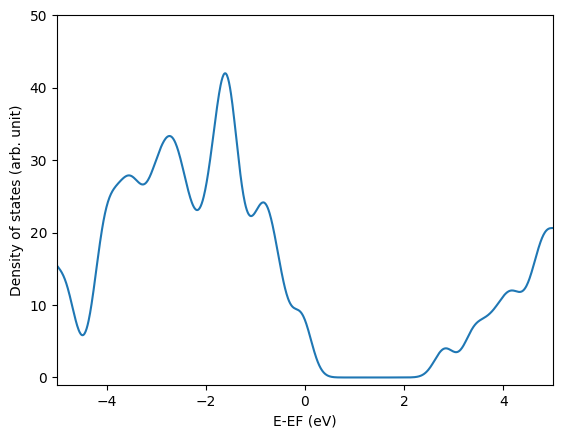

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(energies, DOS)
plt.xlabel('E-EF (eV)')
plt.ylabel('Density of states (arb. unit)')
plt.xlim([-5,5])
plt.ylim([-1,50])
plt.show()

# States at the fermi level indicates its definitely not an insulator